In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

Step 1: Load the Data...
We start by reading the dataset using pandas.

In [35]:
df=pd.read_csv("Potuguesebank.csv")

In [36]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [37]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

Step 2: Preprocessing the Data....
Since the dataset contains categorical variables (e.g., job, marital, education, etc.), we need to convert them into numerical values for the Decision Tree model.

In [38]:
from sklearn.preprocessing import LabelEncoder

# Convert categorical variables to numerical
label_encoders = {}  # Dictionary to store label encoders

for column in df.select_dtypes(include=["object"]).columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])  # Transform categorical data into numbers
    label_encoders[column] = le  # Store encoders for inverse transformation if needed

# Display processed data
print(df.head())


   age  job  marital  education  default  balance  housing  loan  contact  \
0   58    4        1          2        0     2143        1     0        2   
1   44    9        2          1        0       29        1     0        2   
2   33    2        1          1        0        2        1     1        2   
3   47    1        1          3        0     1506        1     0        2   
4   33   11        2          3        0        1        0     0        2   

   day  month  duration  campaign  pdays  previous  poutcome  y  
0    5      8       261         1     -1         0         3  0  
1    5      8       151         1     -1         0         3  0  
2    5      8        76         1     -1         0         3  0  
3    5      8        92         1     -1         0         3  0  
4    5      8       198         1     -1         0         3  0  


LabelEncoder() assigns a unique number to each category.
We iterate through all categorical columns and transform them into numerical values.
The dictionary label_encoders stores these transformations for later reference.
For example:

In [39]:
# Check for missing values
print(df.isnull().sum())


age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


EDA

Target Variable Distribution
Let's check how many people said "yes" or "no" to subscribing.

C:\Users\cheta\AppData\Local\Temp\ipykernel_11896\460980754.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="y", data=df, palette="coolwarm")


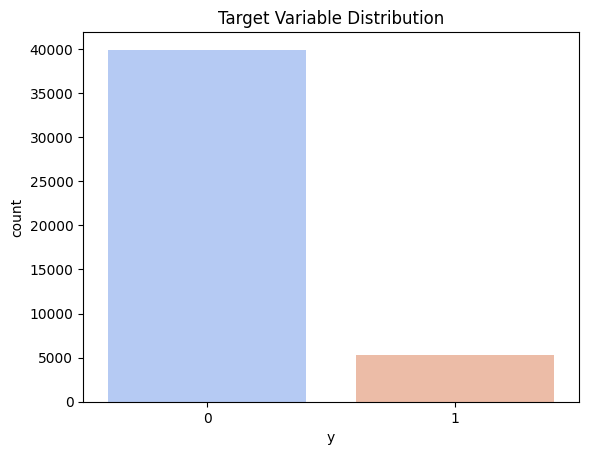

In [40]:
# Countplot for target variable
sns.countplot(x="y", data=df, palette="coolwarm")
plt.title("Target Variable Distribution")
plt.show()


Age Distribution

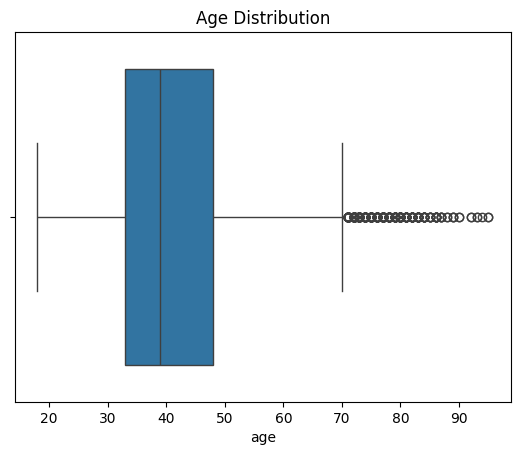

In [41]:
sns.boxplot(x=df["age"])
plt.title("Age Distribution")
plt.show()

Correlation Heatmap

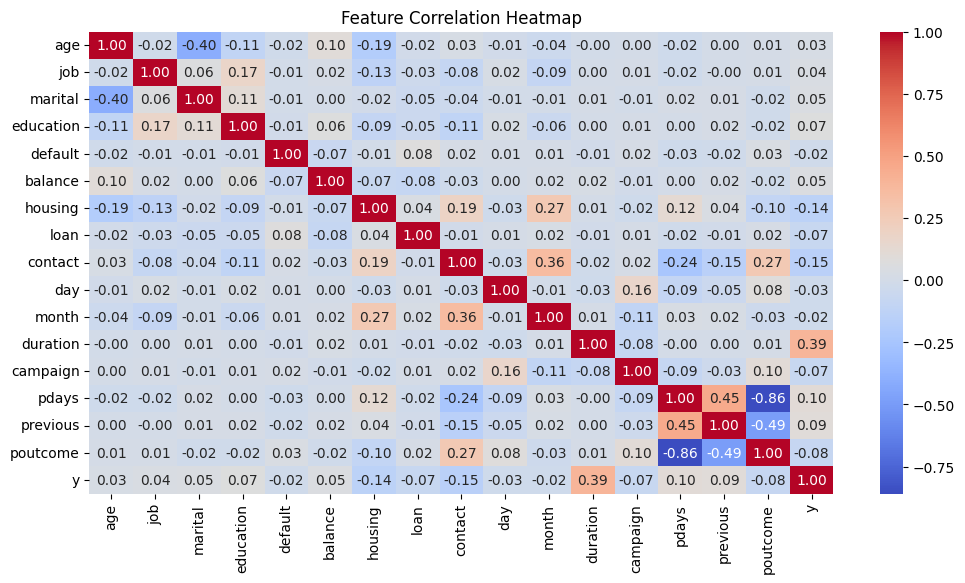

In [42]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()


Step 3: Define Features (X) and Target (y).....
We separate the independent variables (features) and the dependent variable (target).

In [43]:
# Define features (X) and target variable (y)
X = df.drop(columns=["y"])  # All columns except the target variable
y = df["y"]  # The target variable

# Print feature and target shape
print("Feature shape:", X.shape)
print("Target shape:", y.shape)


Feature shape: (45211, 16)
Target shape: (45211,)


X contains all the input features except y (our prediction target).
y is the target variable, which we want to classify.

Step 4: Split the Data into Training and Testing Sets
To evaluate our model's performance, we split the data into training (80%) and testing (20%).

In [44]:
from sklearn.model_selection import train_test_split

# Split data (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print shapes of training and testing data
print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)


Training data shape: (36168, 16)
Testing data shape: (9043, 16)


train_test_split() randomly divides data into a training set and a testing set.
random_state=42 ensures reproducibility (same split each time).

Step 5: Train the Decision Tree Model.....
We now train the Decision Tree Classifier.

In [45]:
from sklearn.tree import DecisionTreeClassifier

# Initialize Decision Tree model
model = DecisionTreeClassifier(random_state=42)

# Train the model
model.fit(X_train, y_train)

print("Model training complete.")


Model training complete.


We initialize a DecisionTreeClassifier with a random_state to ensure consistent results.
.fit(X_train, y_train) trains the model on the training data

Step 6: Make Predictions.....
We use the trained model to predict on the test data.

In [46]:
# Make predictions
y_pred = model.predict(X_test)

# Print first few predictions
print("Predictions:", y_pred[:10])


Predictions: [0 0 0 0 0 0 1 0 0 1]


.predict(X_test) makes predictions for the test set.

tep 7: Evaluate the Model
To check the performance, we calculate accuracy and print a classification report.

In [47]:
from sklearn.metrics import accuracy_score, classification_report

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Print evaluation metrics
print(f"Model Accuracy: {accuracy:.2f}")
print("Classification Report:\n", classification_report(y_test, y_pred))


Model Accuracy: 0.87
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.93      0.93      7952
           1       0.48      0.48      0.48      1091

    accuracy                           0.87      9043
   macro avg       0.70      0.70      0.70      9043
weighted avg       0.87      0.87      0.87      9043



accuracy_score() calculates how many predictions were correct.
classification_report() gives precision, recall, and F1-score for each class.

Step 8: Visualizing the Decision Tree (Optional)
If you want to visualize the decision tree, you can use plot_tree.

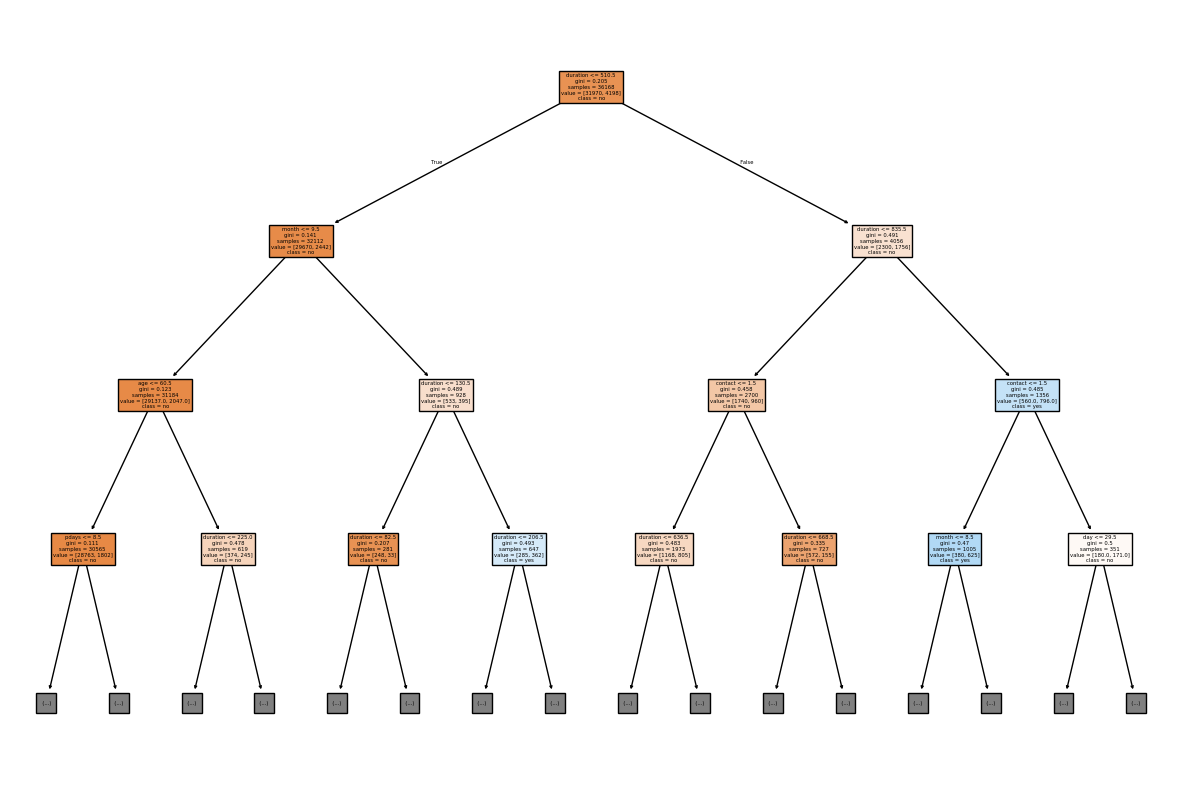

In [48]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(15,10))
plot_tree(model, feature_names=X.columns, class_names=["no", "yes"], filled=True, max_depth=3)
plt.show()
